<font color='blue'> **A__________________________________** </font> 

In [2]:
import matplotlib.pyplot as pt  ; import numpy as np ; import gstools as gs; from gstools.random import MasterRNG ; import matplotlib.pyplot as plt ; import matplotlib.ticker as ticker
import pandas as pd; from pathlib import Path        ; _R=Path("_R")  ;_R.mkdir(exist_ok=True) ; TA=Path("_R/A01")  ;TA.mkdir(exist_ok=True) 

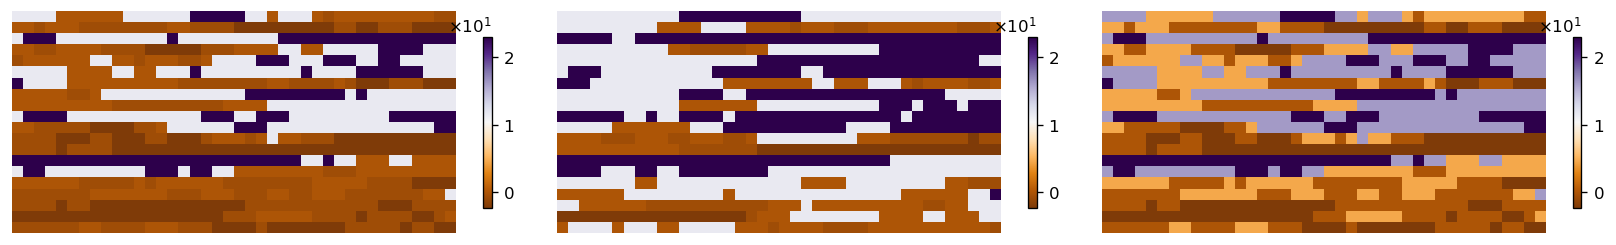

In [3]:
XX = range(20);ZZ=range(40)   ; M = gs.Exponential(dim=2, var=4, len_scale=[50, 1, 3], nugget=0, angles=np.pi / 2)    ; S3 = gs.SRF(M)        ; F3  =S3.structured([XX, ZZ])  
VA1 = np.linspace(np.min(S3.field), np.max(S3.field), 5)                                                                                      ; T3  =S3.transform("discrete",store="f1",values=VA1)
VA2 = [1e-10, 1e-5, 1, 2, 10]                                   ; T2A=S3.transform("discrete", store="f2", values=VA2, thresholds="equal")    ; T2AL=np.log(T2A)*-1   
VA3 = [1e-10, 1e-5, 1, 2, 10]        ; TH = [-1, 1,2,3]             ; T2B=S3.transform("discrete", store="f3", values=VA3, thresholds=TH)         ; T2BL=np.log(T2B)*-1
VA4 = [1e-10, 1e-7, 1e-2, 1e-0, 10]  ; TH = [1e-8,1e-6,1e-4,1e-1]       ; T2C=S3.transform("discrete", store="f3", values=VA4, thresholds="equal")         ; T2CL=np.log(T2C)*-1

fig = plt.figure(figsize=(14,6), dpi=120)                       ; SH = 0.25               
ax=fig.add_subplot(131); im=plt.imshow(T2AL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()
ax=fig.add_subplot(132); im=plt.imshow(T2BL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()
ax=fig.add_subplot(133); im=plt.imshow(T2CL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()

plt.tight_layout();plt.show()

In [4]:
pd.DataFrame(T2A).to_csv(TA/"T2A.csv") ; pd.DataFrame(T2B).to_csv(TA/"T2B.csv") ; pd.DataFrame(T2C).to_csv(TA/"T2C.csv")
print('XY__:',T2A.shape, f"  Mean__:{np.mean(T2A):.1e}", f"  MED__:{np.median(T2A)}",f"     SD__:{np.std(T2A):.1e}", f"     MIN__:{np.min(T2A)}",f"  MAX__:{np.max(T2A)}")
print('XY__:',T2B.shape, f"  Mean__:{np.mean(T2B):.1e}", f"  MED__:{np.median(T2B)}",f"     SD__:{np.std(T2B):.1e}", f"     MIN__:{np.min(T2B)}",f"  MAX__:{np.max(T2B)}")
print('XY__:',T2C.shape, f"  Mean__:{np.mean(T2C):.1e}", f"  MED__:{np.median(T2C)}",f"     SD__:{np.std(T2C):.1e}", f"     MIN__:{np.min(T2C)}",f"  MAX__:{np.max(T2C)}")


XY__: (20, 40)   Mean__:2.4e+00   MED__:1.0      SD__:3.6e+00      MIN__:1e-10   MAX__:10.0
XY__: (20, 40)   Mean__:8.5e-01   MED__:1e-05      SD__:2.2e+00      MIN__:1e-10   MAX__:10.0
XY__: (20, 40)   Mean__:2.0e+00   MED__:0.01      SD__:3.7e+00      MIN__:1e-10   MAX__:10.0


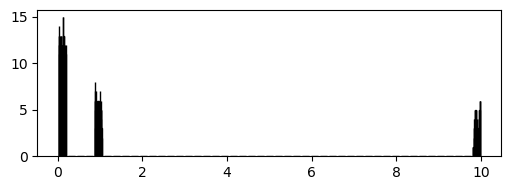

In [5]:
plt.figure(figsize=(10, 2))   ##plt.subplot(121) ; plt.hist(T2A, bins='auto', edgecolor='black') ; plt.tight_layout()
plt.subplot(122) ; plt.hist(T2C, bins='auto', edgecolor='black') ; plt.tight_layout() ; plt.show()

In [6]:
#https://geostat-framework.readthedocs.io/projects/gstools/en/latest/examples/11_plurigaussian/04_3d_pgs.html#sphx-glr-examples-11-plurigaussian-04-3d-pgs-py

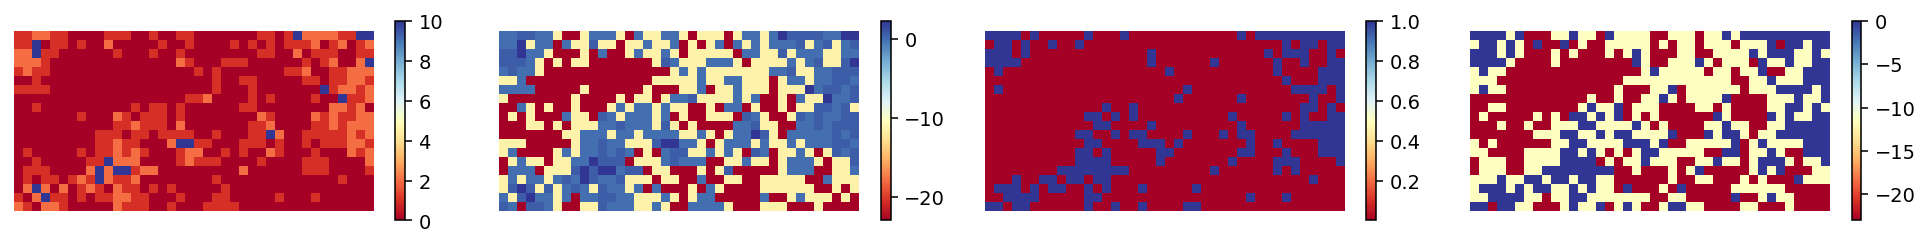

In [7]:
XX = range(20);ZZ=range(40)   ; M = gs.Exponential(dim=2, var=2, len_scale=10, nugget=.2, angles=30)    ; S3 = gs.SRF(M)                      ; F3  =S3.structured([XX, ZZ])  
VA1 = np.linspace(np.min(S3.field), np.max(S3.field), 5)                                                                                      ; T3  =S3.transform("discrete",store="f1",values=VA1)
VA2 = [1e-10, 1e-5, 1, 2, 10]                                   ; T2A=S3.transform("discrete", store="f2", values=VA2, thresholds="equal")    ; T2AL=np.log(T2A)   
VA3 = [1e-10, 1e-5, 1e-0]    ; TH = [-1, 1e-8]                  ; T2B=S3.transform("discrete", store="f3", values=VA3, thresholds=TH)         ; T2BL=np.log(T2B)
fig = plt.figure(figsize=(14,6), dpi=140)                                      
ax=fig.add_subplot(141);plt.imshow(T2A ,cmap='RdYlBu');plt.colorbar(shrink=SH);plt.axis('off');ax=fig.add_subplot(142);plt.imshow(T2AL,cmap='RdYlBu');plt.colorbar(shrink=SH);plt.axis('off')
ax=fig.add_subplot(143);plt.imshow(T2B ,cmap='RdYlBu');plt.colorbar(shrink=SH);plt.axis('off');ax=fig.add_subplot(144);plt.imshow(T2BL,cmap='RdYlBu');plt.colorbar(shrink=SH);plt.axis('off');plt.tight_layout();plt.show()

In [7]:
# https://geostat-framework.readthedocs.io/projects/gstools/en/latest/examples/07_transformations/04_bimodal.html       3D


#XX = range(20) ; ZZ = range(30)           #; M = gs.Gaussian(dim=2, var=1, len_scale=10)                         ; S1 = gs.SRF(M, seed=1)         ;F1=S1.structured([XX, ZZ])  
#XX=ZZ= range(20) ; np.arange(200) * 0.5   #; M = gs.Gaussian(dim=2, var=1, len_scale=5)                          ; S2 = gs.SRF(M, seed=20170519)  ;F2=S2.structured([XX, ZZ])